# Analys av Iris datasetet med Scikit-Learn
## Multinomial Logistic Regression (Softmax Regression)
### Mål:
- Repetera Machine Learning: Scikit-Learn, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av logistic regression.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
- Angående Linjär Regression: Kan ej användas för klassificering. Endast för numeriska output.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.model_selection import train_test_split`  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`model = LogisticRegression(solver='lbfgs', max_iter=1000)`
- ***'lbfgs'*** stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno, which is an optimization algorithm that is particularly efficient for large datasets. It is a quasi-Newton method that approximates the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm using limited memory.
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`

- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
## Noteringar / Lessons Learned
- Logistic Regression är bäst för binary classification, men den kan också användas för multi-class classification
- Resultatet är 100% korrekt
## Länkar:
[Geek for Geeks - Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)

In [75]:
import seaborn as sn
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np
#sn.get_dataset_names() # list of available datasets

In [76]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='petal_length', ylabel='petal_width'>

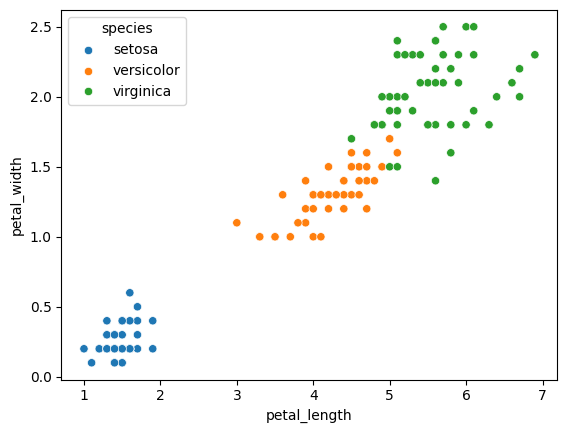

In [77]:
sn.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

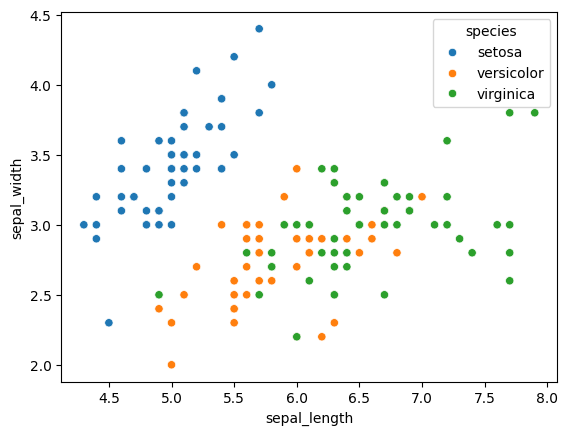

In [78]:
sn.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

In [79]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Byter ut strings till integers, för target kolumnen.

In [80]:
pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Train / Test split:

In [81]:
# Define X and y
X = iris.drop(columns=['species'])
y = iris[['species']]

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values.ravel()
    y_train = y_train.astype(int) # make sure y_train is of type int
print(type(y_train))

<class 'numpy.ndarray'>


In [83]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test, np.ndarray):
	y_test = y_test.values.ravel()
	y_test = y_test.astype(int) # make sure y_test is of type int

y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

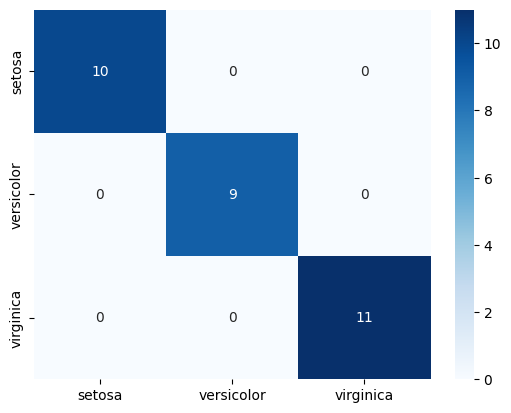

In [86]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])